# **Evolutionary Computing, lab 5 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

### **2.1. Data**
**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $distanceMatrix[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node

**Output:**
- $route$: list of nodes forming a closed Hamiltonian cycle  
- $totalCost = \text{distance cost} + \text{node costs}$

### **2.2. solve_steepest_LM function:**

```text
function SOLVE_STEEPEST_LM(initialRoute):

    route ← copy(initialRoute)
    if route is closed (first == last):
         remove last node

    selected ← set(route)
    remaining ← all node indices NOT in selected

    improvingMoveList ← empty list
    improved ← true

    while improved:
        improved ← PERFORM_STEEPEST_STEP_LM(route, remaining)

    append route[0] to close route
    return Result(route, computeTotalCost(route))

### **2.3. perform_steepest_LM function**

```text
function PERFORM_STEEPEST_STEP_LM(route, remaining):

    if improvingMoveList is empty:
         POPULATE_MOVE_LIST(route, remaining)
         if improvingMoveList is empty:
              return false

    succMap ← build successor map from route
    predMap ← build predecessor map from route

    sort improvingMoveList by delta (best first)

    for each move in improvingMoveList:
        val ← VALIDATE_MOVE(move, succMap, predMap, remaining)

        if val.keepMove == false:
            remove move from improvingMoveList
            continue

        if val.applyMove == false:
            continue

        changedNodes ← APPLY_MOVE_LM(route, remaining, move, val)
        remove move from improvingMoveList

        UPDATE_LOCAL_MOVES(route, remaining, changedNodes, move.type)

        return true
    return false

### **2.4. populate_move_list function**

```text
function POPULATE_MOVE_LIST(route, remaining):

    clear improvingMoveList
    n ← route length

    for i in 0..n-1:
        inCycle ← route[i]
        for outOfCycle in remaining:
            delta ← deltaInter(route, i, outOfCycle)
            if delta < 0:
                prev ← route[(i-1) mod n]
                next ← route[(i+1) mod n]
                add inter-route move(prev, next, inCycle, outOfCycle, delta)

    for i in 0..n-2:
        for j in i+1..n-1:
            delta ← deltaTwoOpt(route, i, j)
            if delta < 0:
                a ← route[i]
                b ← route[(i+1) mod n]
                c ← route[j]
                d ← route[(j+1) mod n]
                if c != b:
                    add 2-opt move(a, b, c, d, delta)

    sort improvingMoveList by delta

### **2.5. validate_move function**

```text
function VALIDATE_MOVE(move, succMap, predMap, remaining):

    if move.type == INTER_ROUTE:

         A = move.nodeA
         B = move.nodeB
         C = move.nodeC
         D = move.nodeD

         edgesExist = edge(A → C or C → A exists) AND edge(C → B or B → C exists)

         D_exists = (D in remaining)

         if not edgesExist OR not D_exists:
             return (keepMove=false, applyMove=false)

         if edges are oriented A→C and C→B:
             return (keepMove=true, applyMove=true, applyReversed=false)

         if edges are oriented B→C and C→A:
             return (keepMove=true, applyMove=true, applyReversed=true)

         return (keepMove=true, applyMove=false)


    if move.type == TWO_OPT:

         A = move.nodeA
         B = move.nodeB
         C = move.nodeC
         D = move.nodeD

         if not (A–B exists AND C–D exists):
             return (keepMove=false, applyMove=false)

         if edges are forward (A→B and C→D):
             return (keepMove=true, applyMove=true, reversed=false)

         if edges are reversed (B→A and D→C):
             return (keepMove=true, applyMove=true, reversed=true)

         return (keepMove=true, applyMove=false)

## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

In [2]:
stats = pd.read_csv('evaluation/TSPA_stats.csv')
stats

,method_name,min,max,avg,sd
0,steepest_edge_LM_random,71052.0,78012.0,74046.97,1267.31
1,steepest_edge_baseline_random,71199.0,78585.0,73852.69,1233.31


#### **3.1.2. Instance B** 

In [5]:
stats = pd.read_csv('evaluation/TSPB_stats.csv')
stats

,method_name,min,max,avg,sd
0,steepest_edge_LM_random,45039.0,51931.0,48552.19,1176.04
1,steepest_edge_baseline_random,45580.0,51563.0,48432.57,1226.31


### **3.2. Times** ###

#### **3.2.1. Instance A**

In [10]:
times = pd.read_csv('evaluation/TSPA_times.csv')
times.rename(columns={'avg_time_ms': 'average time of one iteration (ms)'}, inplace=True)
times

,method_name,average time of one iteration (ms)
0,steepest_edge_LM_random,8.150101
1,steepest_edge_baseline_random,28.356678


#### **3.2.2. Instance B**

In [12]:
times = pd.read_csv('evaluation/TSPB_times.csv')
times.rename(columns={'avg_time_ms': 'average time of one iteration (ms)'}, inplace=True)
times

,method_name,average time of one iteration (ms)
0,steepest_edge_LM_random,7.579666
1,steepest_edge_baseline_random,27.604284


## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [13]:
tsp_a = pd.read_csv('../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [16]:
tsp_a_steepest_baseline = np.array(pd.read_csv('evaluation/results/TSPA_steepest_edge_baseline_random.csv', sep=';', header=None).values).flatten()
tsp_a_steepest_with_LM = np.array(pd.read_csv('evaluation/results/TSPA_steepest_edge_LM_random.csv', sep=';', header=None).values).flatten()

In [17]:
tsp_b_steepest_baseline = np.array(pd.read_csv('evaluation/results/TSPB_steepest_edge_baseline_random.csv', sep=';', header=None).values).flatten()
tsp_b_steepest_with_LM = np.array(pd.read_csv('evaluation/results/TSPB_steepest_edge_LM_random.csv', sep=';', header=None).values).flatten()

In [18]:
def plot_tsp(tsp, solution, title):
    unused_nodes = np.array(set(tsp.index).difference(solution))
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    X_unused = tsp['x'].loc[unused_nodes].values
    Y_unused = tsp['y'].loc[unused_nodes].values
    costs_unused = tsp['cost'].loc[unused_nodes].values

    plt.figure(figsize=(15, 9))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X_unused, Y_unused, s=costs_unused, color="grey", alpha=0.4, label="Unused nodes")
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

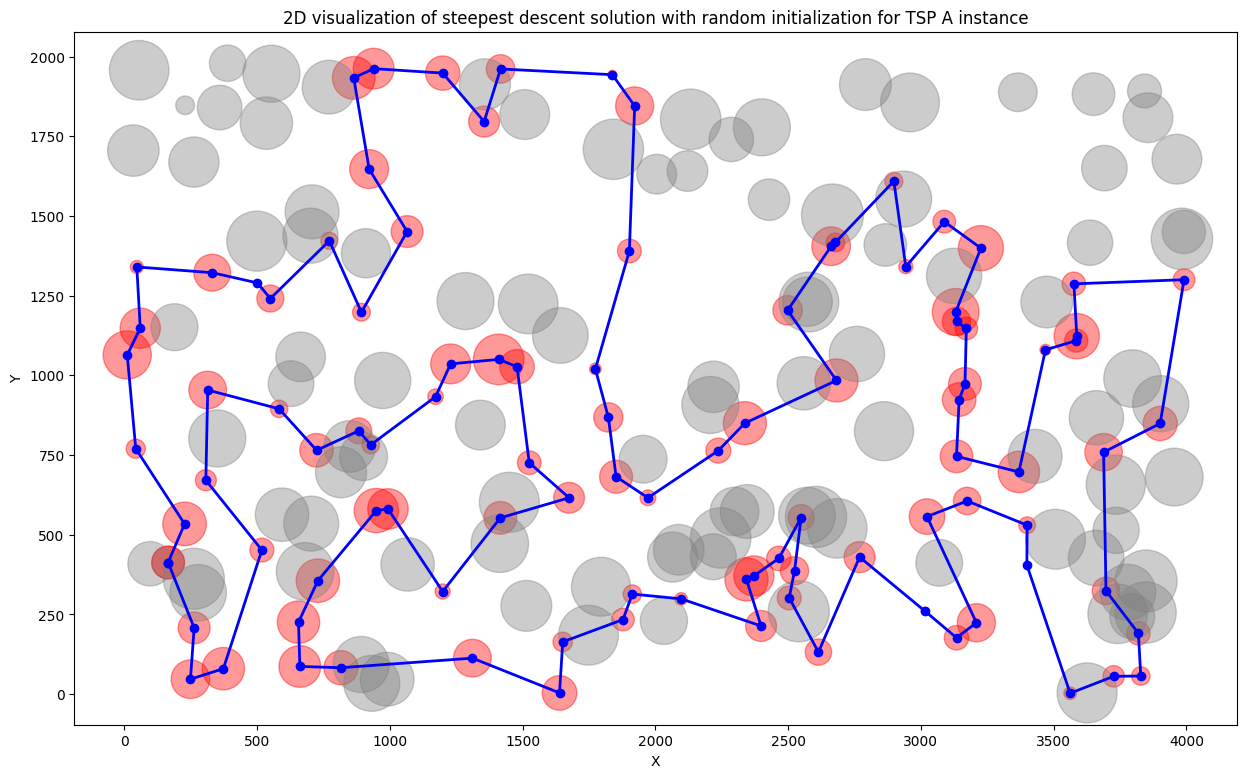

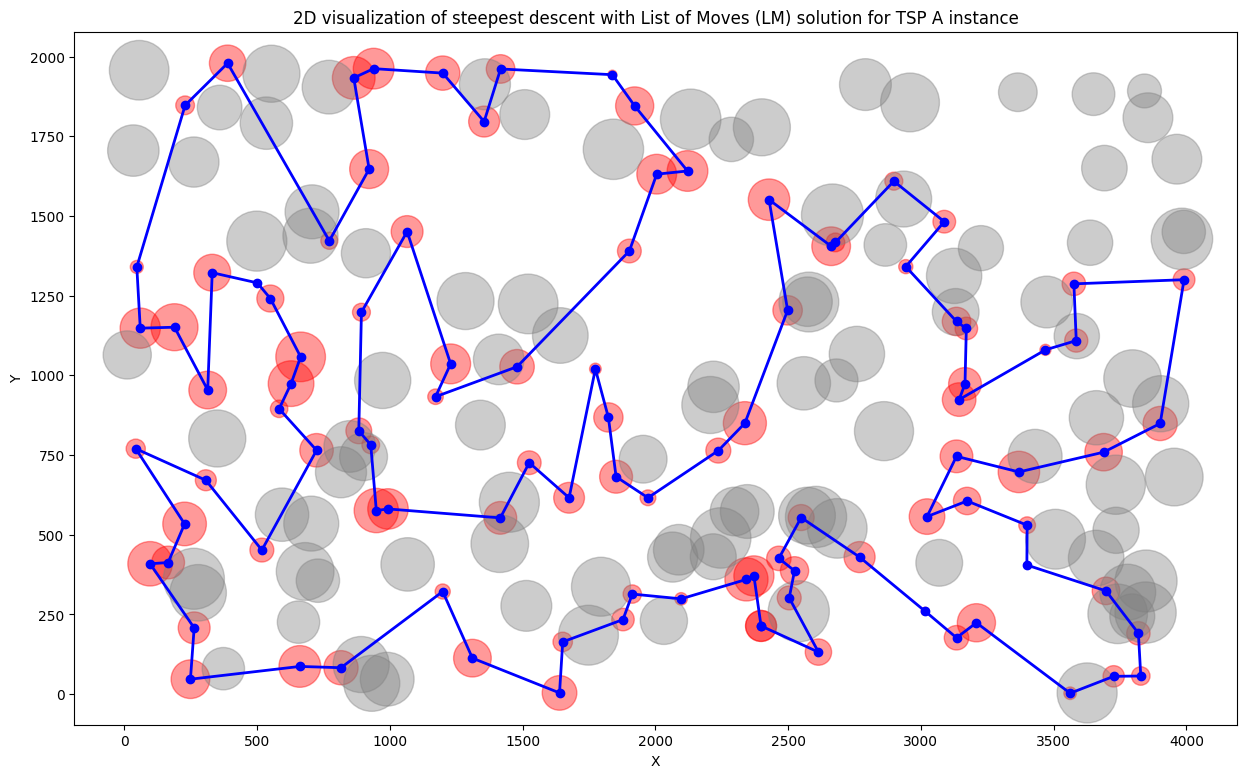

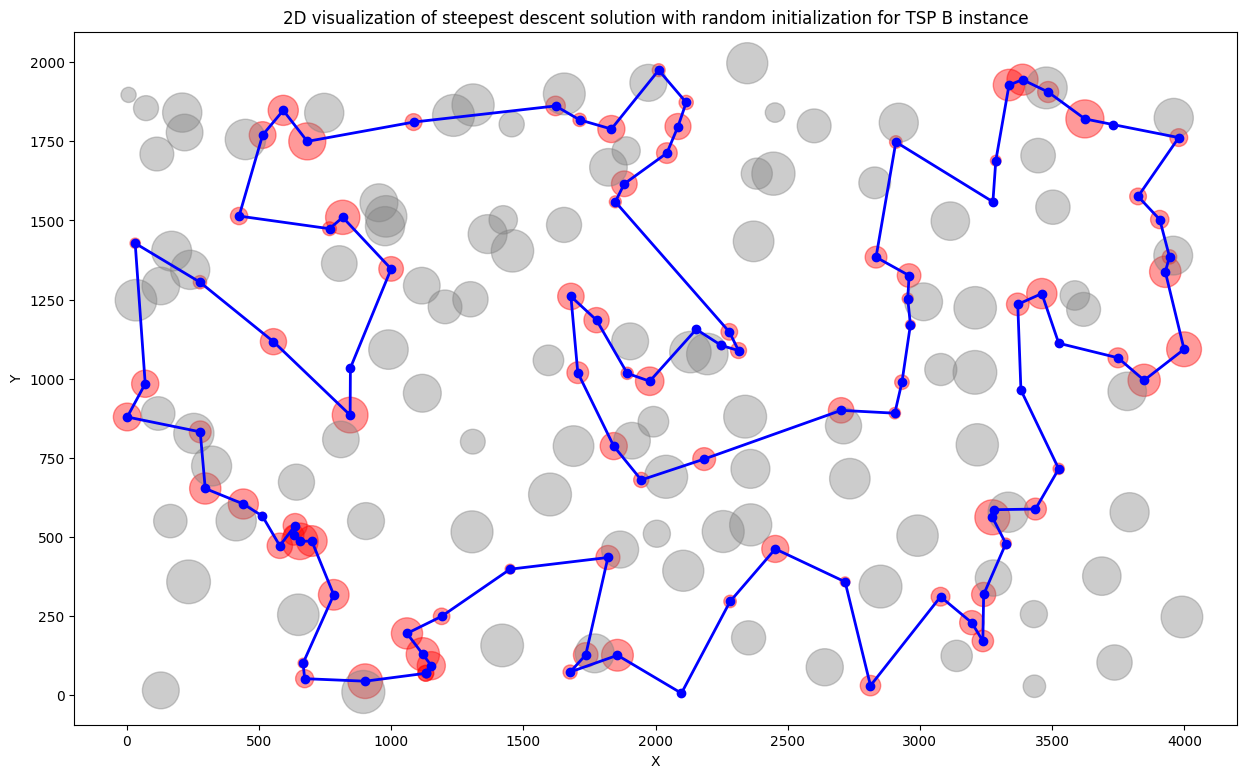

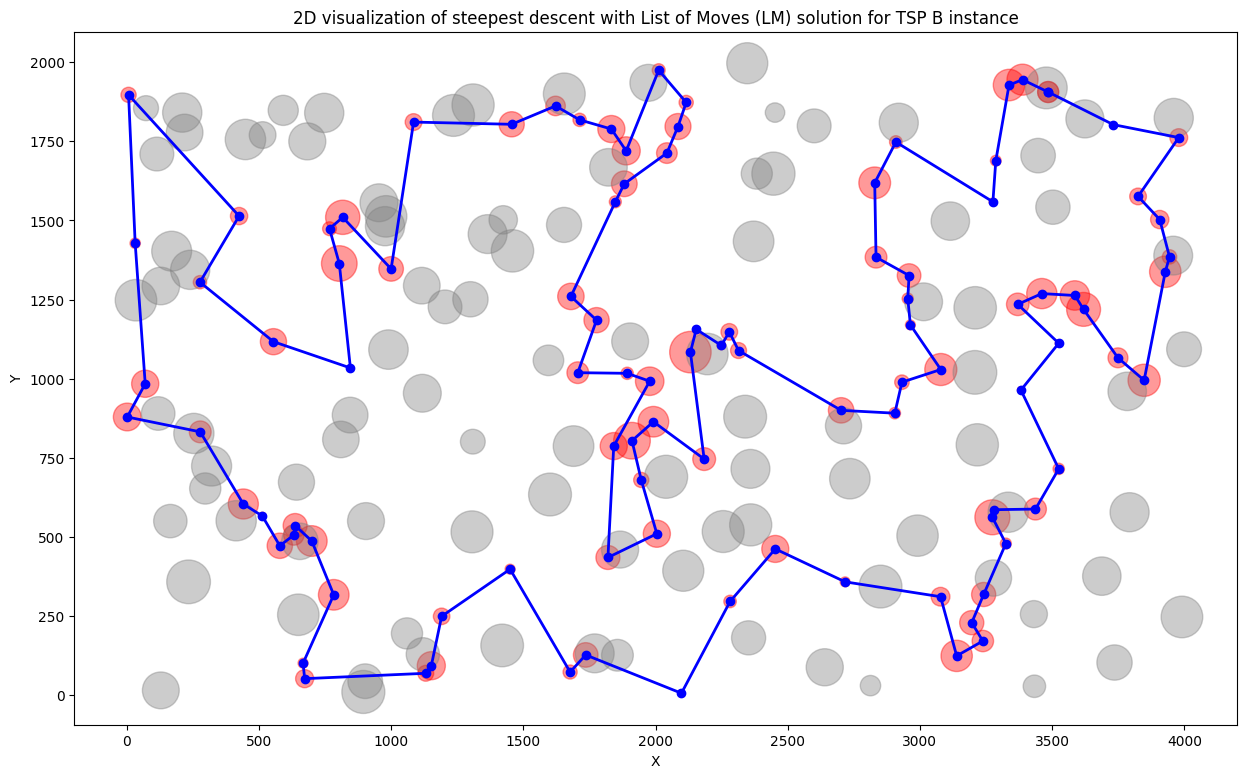

In [26]:
instances = [
    (tsp_a, tsp_a_steepest_baseline, '2D visualization of steepest descent solution with random initialization for TSP A instance'),
    (tsp_a, tsp_a_steepest_with_LM, '2D visualization of steepest descent with List of Moves (LM) solution for TSP A instance'),
    (tsp_b, tsp_b_steepest_baseline, '2D visualization of steepest descent solution with random initialization for TSP B instance'),
    (tsp_b, tsp_b_steepest_with_LM, '2D visualization of steepest descent with List of Moves (LM) solution for TSP B instance'),
]
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

### **5.1. TSP A instance** ###
#### **5.1.1. Pure 2-Regret Greedy Cycle Heuristic solution** ####

In [21]:
tsp_a_steepest_baseline

array([ 54,  48,  34, 103, 146,  22, 159, 193,  41, 139, 115,  46,  68,
       140,  93, 117,   0, 143, 183,  89, 137, 176,  80,  79,  63,  94,
       124, 167, 148,   9,  62, 144,  49,  14, 138,   3, 178, 106,  52,
        55,  57, 179, 185,  40, 119, 165,  90,  81, 196,  31, 113, 175,
       171,  16,  78, 145,  92, 129,  25,  44, 120,   2,  75, 101,   1,
       152,  97,  26, 100,  86,  53, 180, 154, 135,  70, 127, 112,   4,
        84,  35, 131, 149, 123, 162, 133, 151,  51, 109, 118,  59,  65,
       116,  43,  42, 181, 160, 184, 190,  10, 177,  54])

#### **5.1.2. Weighted Sum 2-Regret Greedy Cycle Heuristic solution** ####

In [23]:
tsp_a_steepest_with_LM

array([ 86,  75, 101,   1,  97, 152,   2, 120,  44,  25,  16, 171, 175,
       113,  31,  78, 145,  92, 129,  57, 179, 196,  81,  90, 165,  40,
       185,  55,  52, 106, 178,  49,  14, 144,  62,   9,  15, 148, 124,
        94,  63,  79,  80, 176, 133, 151, 162, 149, 131,  65, 116, 115,
        46, 118,  59,  51, 137,  23, 186,  89, 183, 143,   0, 117,  93,
       140,  68, 139, 108,  18,  22, 146, 195, 181, 159, 193,  41,  96,
         5,  42,  43, 184, 160,  34,  48,  54,  30, 177,  10,   4, 112,
       123, 127,  70, 135, 154, 180,  53, 100,  26,  86])

### **5.2. TSP B instance** ###

#### **5.2.1. Pure 2-Regret Greedy Cycle Heuristic solution** ####

In [22]:
tsp_b_steepest_baseline

array([175,  78, 142,  45,   5, 177,  21,  61,  36,  91, 141,  77,  81,
       153, 187, 163,  89, 127, 103, 113, 180, 176, 194, 166,  86,  95,
       130, 185, 179, 172,  57,  66,  94,  47, 148,  60,  20,  59,  28,
       149,   4, 140, 183, 152,  34,  55,  18,  62, 124, 106, 143, 111,
         8, 104, 138, 139,  11,  33, 160,  29,   0,  35, 109, 168, 195,
       145,  15,   3,  70, 132, 169, 188, 147, 178,  10, 133, 122,  90,
       191,  51, 121, 112, 131, 135,  63,  38,  27,   1, 156, 198, 117,
       193,  54,  31, 164,  73, 136, 190,  80, 162, 175])

#### **5.2.2. Weighted Sum 2-Regret Greedy Cycle Heuristic solution** ####

In [24]:
tsp_b_steepest_with_LM

array([ 28,  20,  60, 148,  47,  94,  66, 172, 179,  22,  99, 130,  95,
       185,  86, 166, 194, 176, 180, 113, 103,  89, 127, 165, 163, 153,
        81,  77, 141,  61,  36, 177,   5,  78, 175,  80, 190, 136,  73,
        54,  31, 193, 117, 198,   1,  27,  38,  63,  40, 122, 135, 131,
       121, 125,  90, 191,  51, 147,   6, 188, 169, 132,  13,  70,   3,
        15, 145, 195, 168, 139,  11, 138,  33, 160, 104,  21,  82,   8,
        56, 144, 111,  39,  29,   0, 109,  35, 143, 106, 124, 128,  62,
        18,  55,  34, 170, 152, 183, 140,   4, 149,  28])

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab5

## **8. Conclusions**

1. 